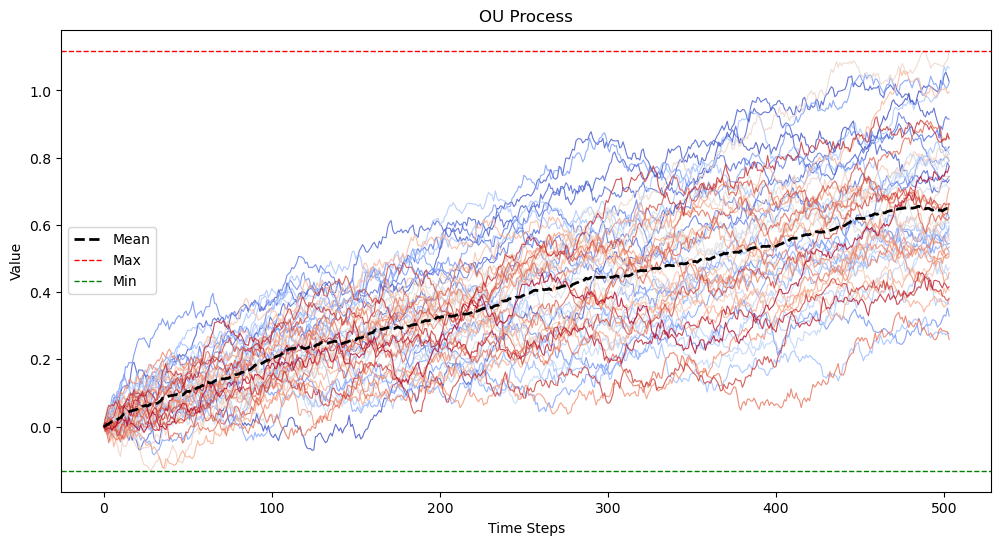

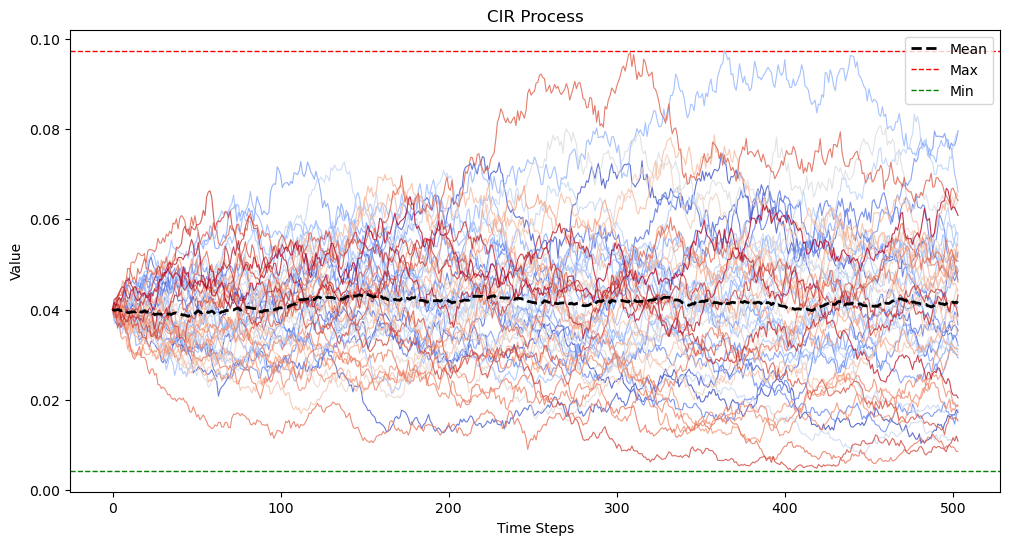

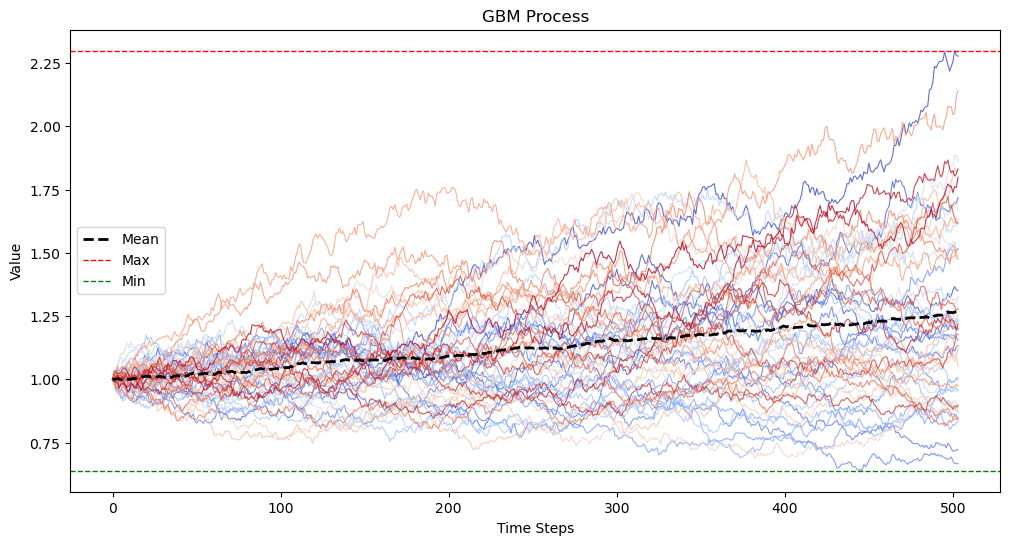

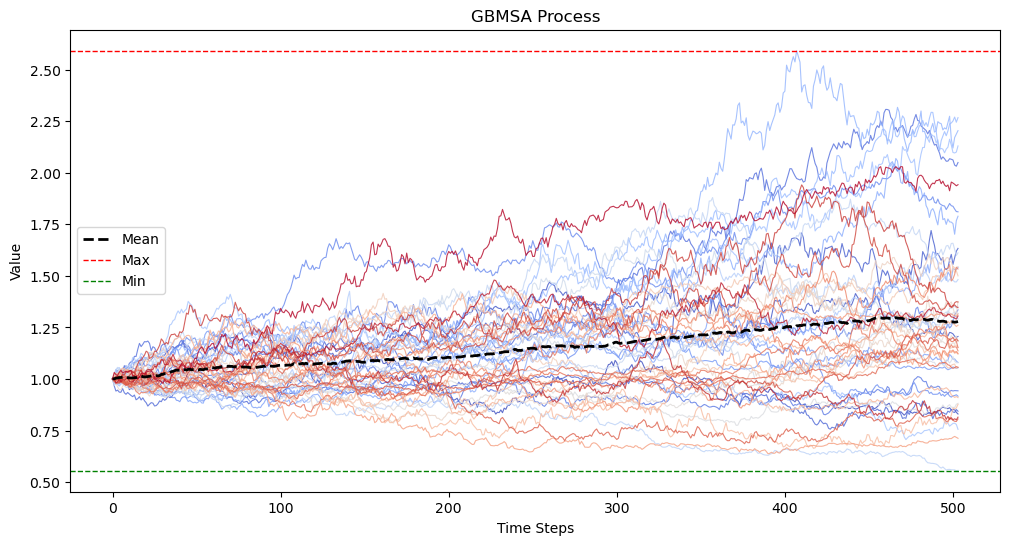

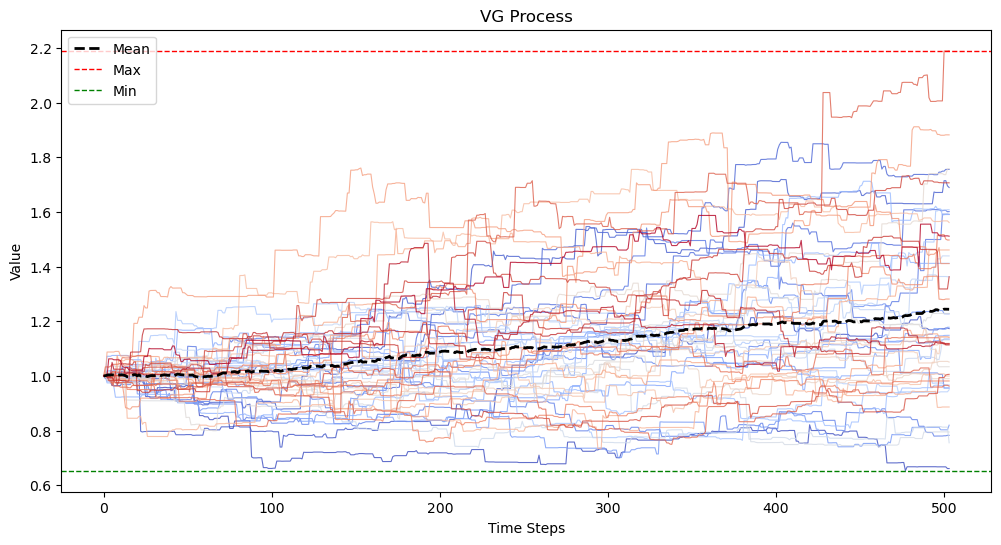

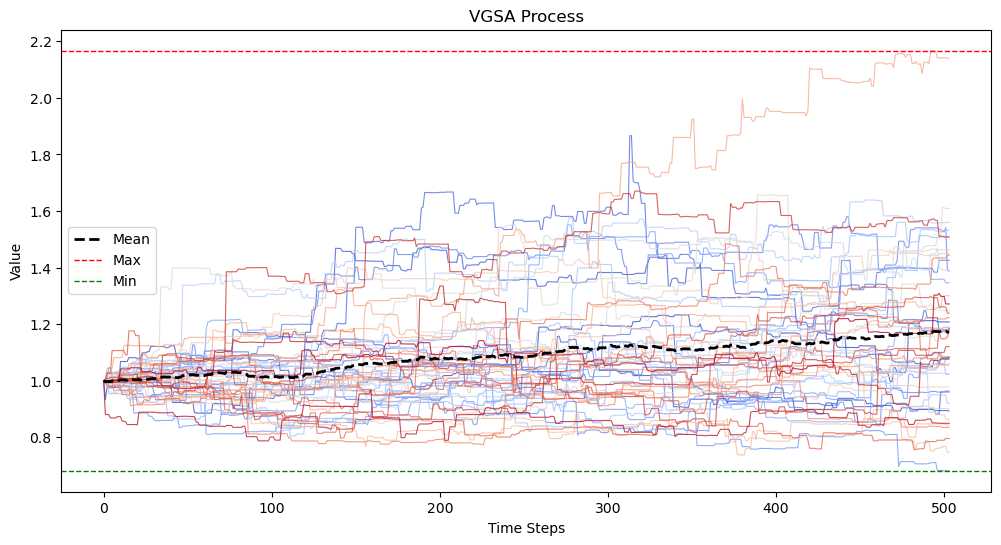

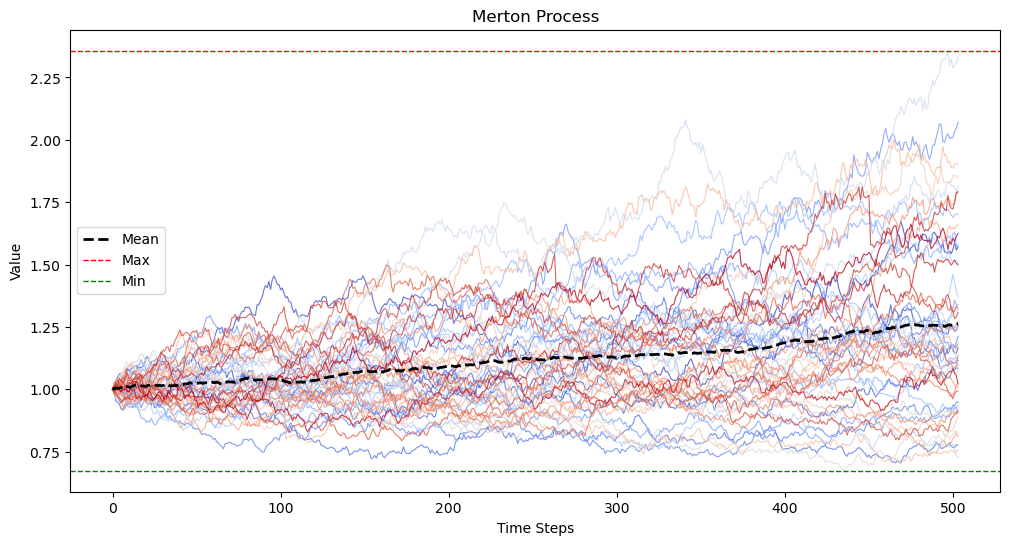

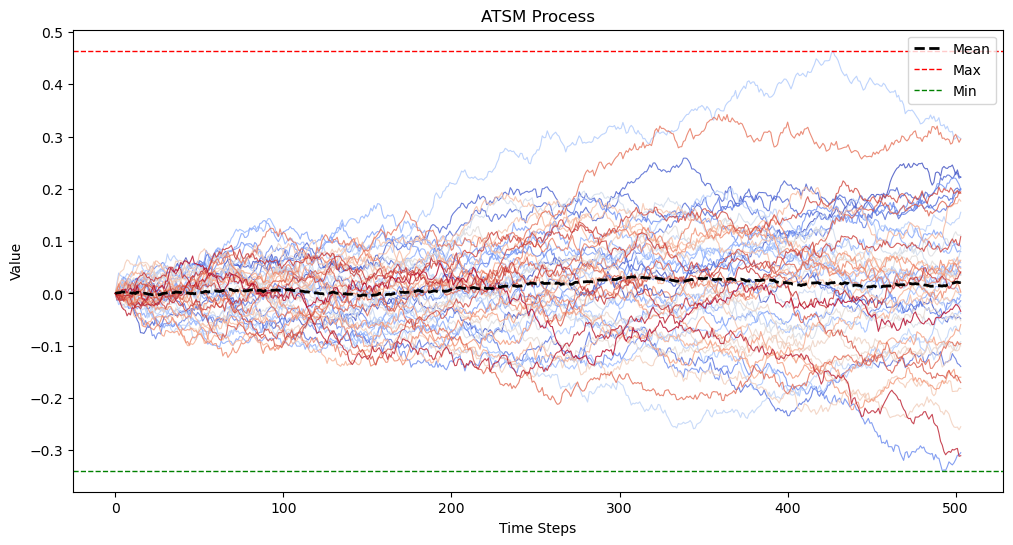

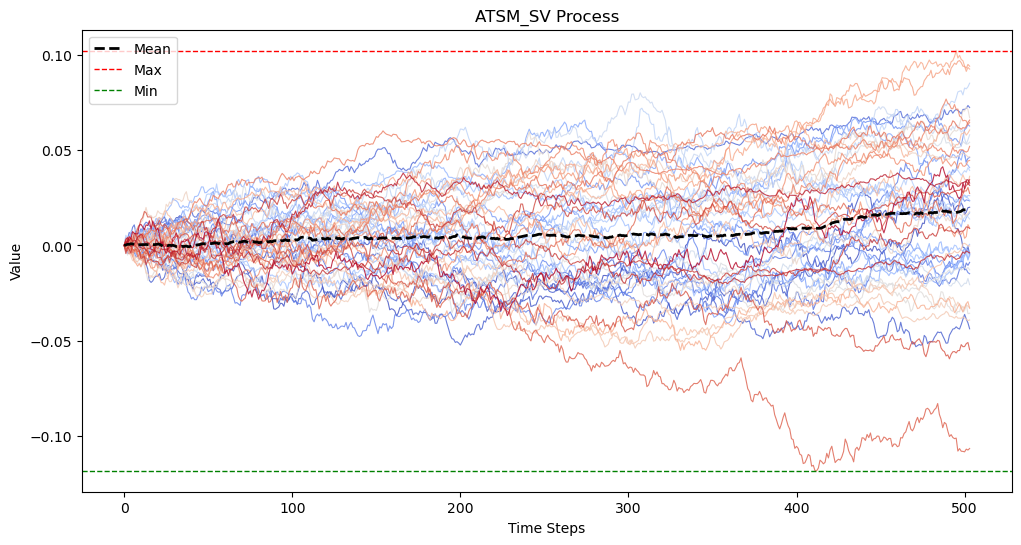

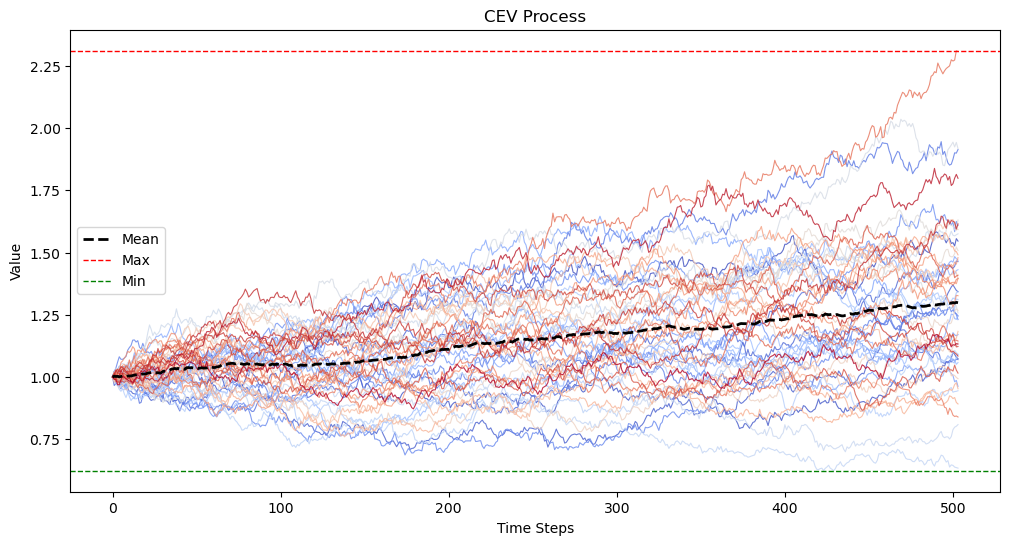

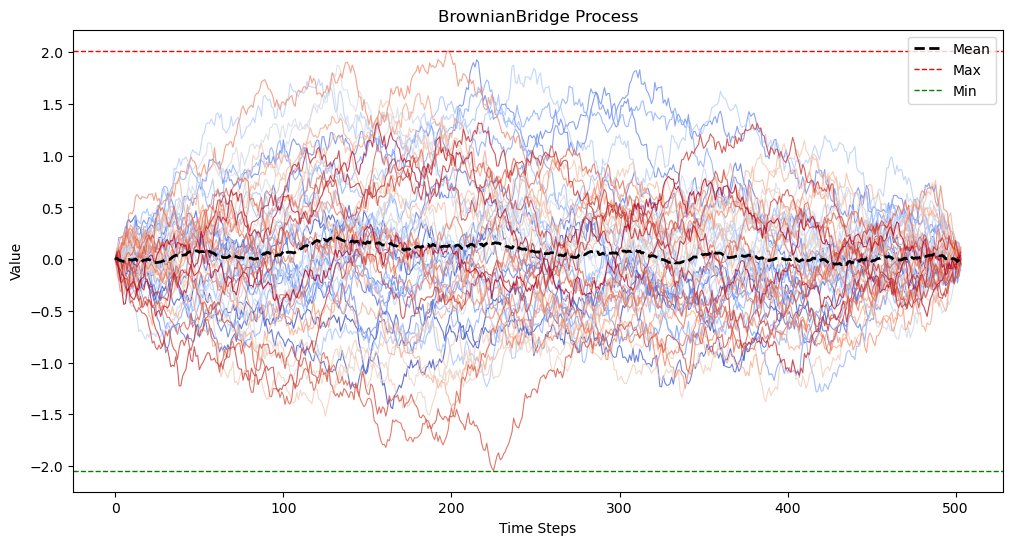

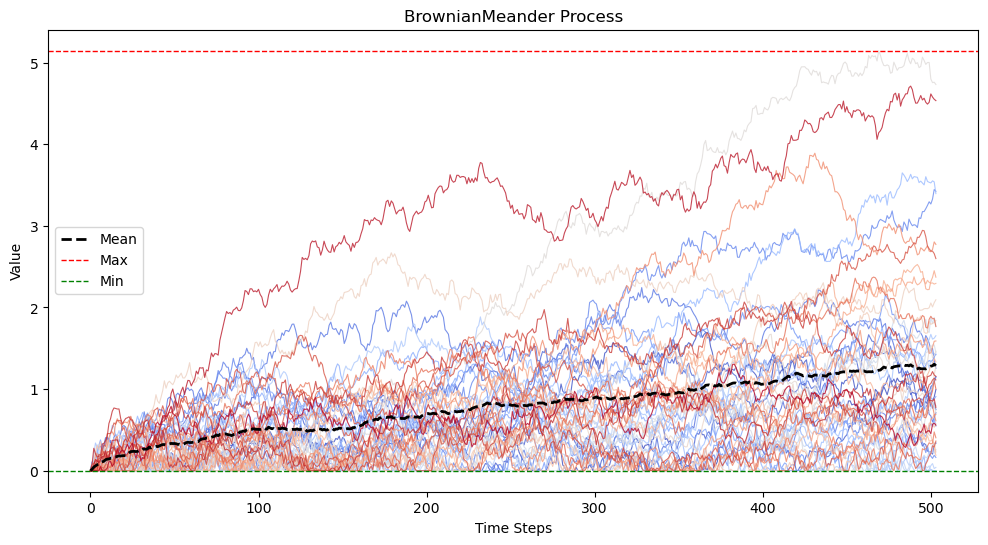

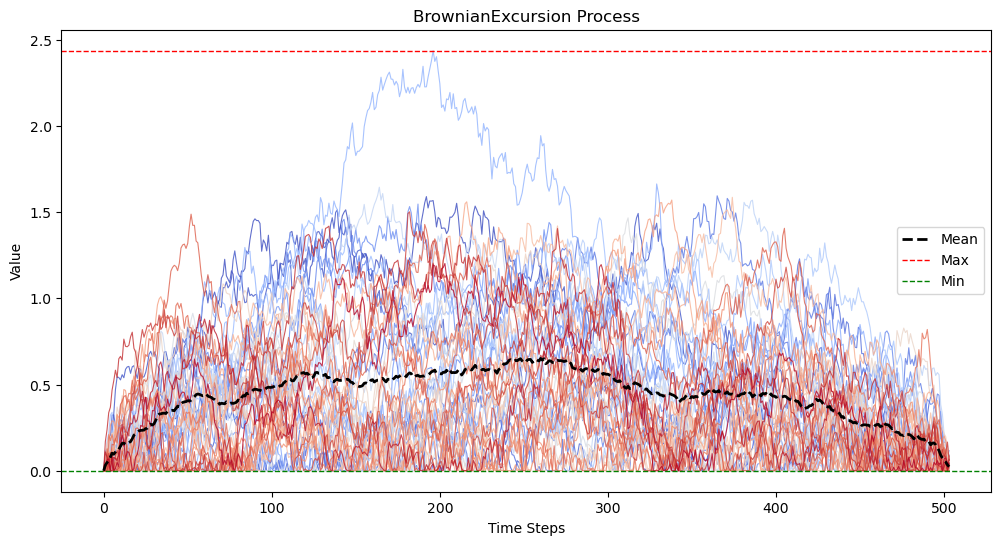

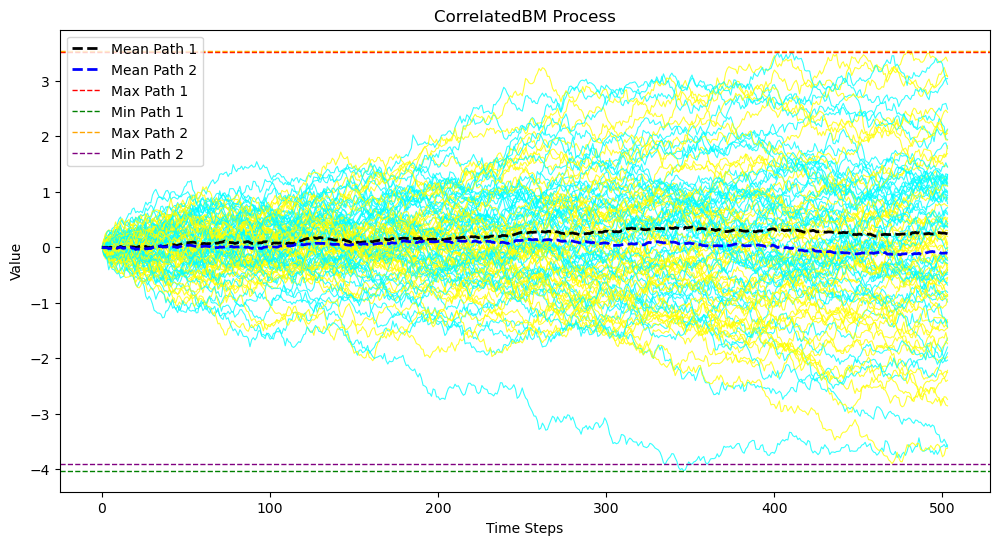

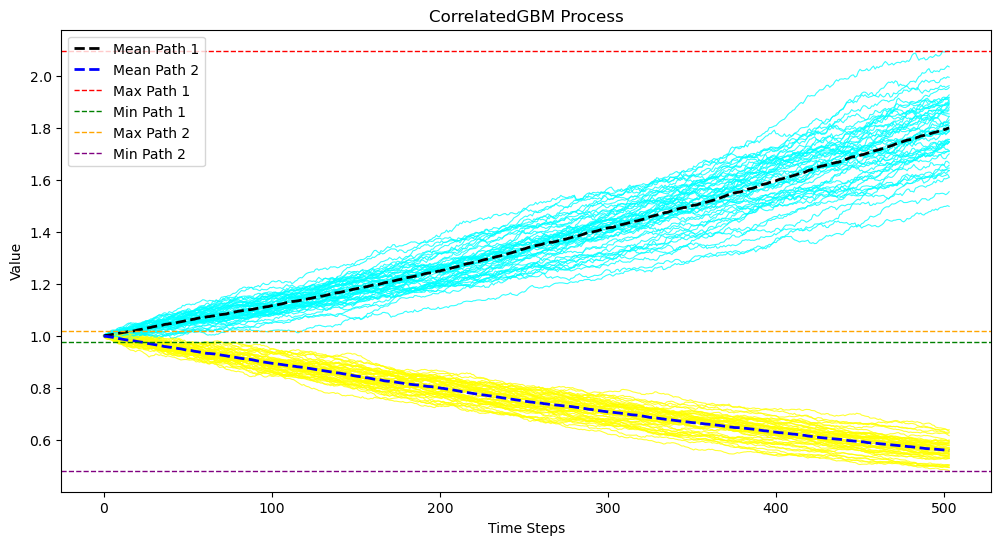

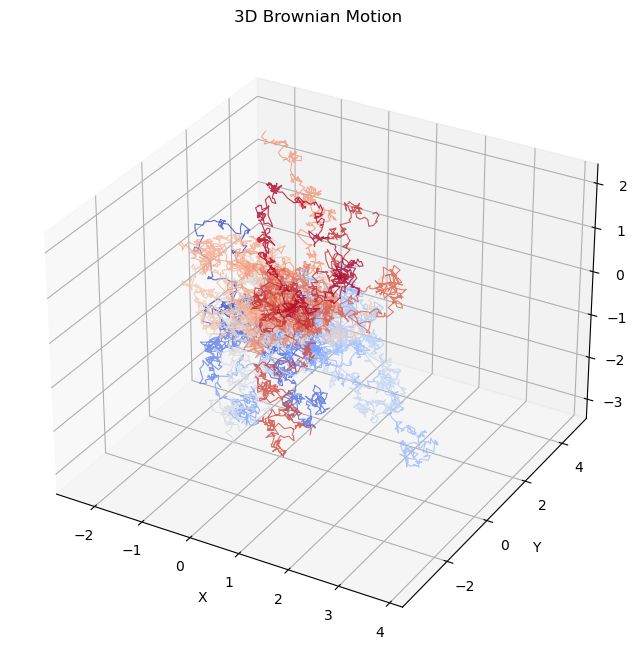

              Process  Time (s)
0                  OU  0.012961
1                 CIR  0.022316
2                 GBM  0.015146
3               GBMSA  0.048115
4                  VG  0.016407
5                VGSA  0.037215
6              Merton  0.164458
7                ATSM  0.018899
8             ATSM_SV  0.042884
9                 CEV  0.016819
10     BrownianBridge  0.016747
11    BrownianMeander  0.015292
12  BrownianExcursion  0.018305
13       CorrelatedBM  0.018514
14      CorrelatedGBM  0.030062
15     dDimensionalBM  0.019433


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import time
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from StochasticProcessSimulator import StochasticProcessSimulator  

# List of process types
processes = [
    'OU', 'CIR', 'GBM', 'GBMSA', 'VG', 'VGSA', 'Merton',
    'ATSM', 'ATSM_SV', 'CEV', 'BrownianBridge', 'BrownianMeander',
    'BrownianExcursion', 'CorrelatedBM', 'CorrelatedGBM', 'dDimensionalBM'
]

# Simulation parameters
num_paths = 50
path_length = 2 * 252  # 2 years with 252 trading days per year
dt = 1 / 252

# Initialize a dataframe to store execution times
execution_times = pd.DataFrame(columns=['Process', 'Time (s)'])

# Function to plot 2D paths with a colormap
def plot_paths(paths, title):
    plt.figure(figsize=(12, 6))
    cmap = plt.get_cmap('coolwarm')
    colors = cmap(np.linspace(0, 1, paths.shape[0]))
    for i in range(paths.shape[0]):
        plt.plot(paths[i], color=colors[i], alpha=0.8, linewidth=0.8)
    mean_path = np.mean(paths, axis=0)
    plt.plot(mean_path, color='black', linestyle='--', linewidth=2, label='Mean')
    plt.axhline(np.max(paths), color='red', linestyle='--', linewidth=1, label='Max')
    plt.axhline(np.min(paths), color='green', linestyle='--', linewidth=1, label='Min')
    plt.title(title)
    plt.xlabel('Time Steps')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

# Function to plot correlated 2D paths with different colormaps
def plot_correlated_paths(paths, title):
    plt.figure(figsize=(12, 6))
    for i in range(paths.shape[0]):
        plt.plot(paths[i, :, 0], color='cyan', alpha=0.8, linewidth=0.8)
        plt.plot(paths[i, :, 1], color='yellow', alpha=0.8, linewidth=0.8)
    mean_path1 = np.mean(paths[:, :, 0], axis=0)
    mean_path2 = np.mean(paths[:, :, 1], axis=0)
    plt.plot(mean_path1, color='black', linestyle='--', linewidth=2, label='Mean Path 1')
    plt.plot(mean_path2, color='blue', linestyle='--', linewidth=2, label='Mean Path 2')
    plt.axhline(np.max(paths[:, :, 0]), color='red', linestyle='--', linewidth=1, label='Max Path 1')
    plt.axhline(np.min(paths[:, :, 0]), color='green', linestyle='--', linewidth=1, label='Min Path 1')
    plt.axhline(np.max(paths[:, :, 1]), color='orange', linestyle='--', linewidth=1, label='Max Path 2')
    plt.axhline(np.min(paths[:, :, 1]), color='purple', linestyle='--', linewidth=1, label='Min Path 2')
    plt.title(title)
    plt.xlabel('Time Steps')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

# Function to plot 3D paths with a colormap
def plot_3d_paths(paths, title):
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    cmap = plt.get_cmap('coolwarm')
    colors = cmap(np.linspace(0, 1, paths.shape[0]))
    for i in range(paths.shape[0]):
        ax.plot(paths[i, :, 0], paths[i, :, 1], paths[i, :, 2], color=colors[i], alpha=0.8, linewidth=0.8)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.show()

# Loop through each process type
for process in processes:
    start_time = time.time()

    # Set specific parameters for different processes
    if process == 'OU':
        simulator = StochasticProcessSimulator(
            process_type=process, num_paths=num_paths, path_length=path_length, dt=dt, 
            kappa=0.5, theta=1.0, sigma=0.2, X0=0.0
        )
    elif process == 'CIR':
        simulator = StochasticProcessSimulator(
            process_type=process, num_paths=num_paths, path_length=path_length, dt=dt, 
            kappa=0.5, theta=0.04, sigma=0.1, X0=0.04
        )
    elif process == 'GBM':
        simulator = StochasticProcessSimulator(
            process_type=process, num_paths=num_paths, path_length=path_length, dt=dt, 
            mu=0.1, sigma=0.2, S0=1.0
        )
    elif process == 'GBMSA':
        simulator = StochasticProcessSimulator(
            process_type=process, num_paths=num_paths, path_length=path_length, dt=dt, 
            mu=0.1, sigma=0.2, S0=1.0, kappa=1.0, theta=0.04, rho=0.3, v0=0.04
        )
    elif process == 'VG':
        simulator = StochasticProcessSimulator(
            process_type=process, num_paths=num_paths, path_length=path_length, dt=dt, 
            sigma=0.2, theta=0.1, nu=0.1, S0=1.0
        )
    elif process == 'VGSA':
        simulator = StochasticProcessSimulator(
            process_type=process, num_paths=num_paths, path_length=path_length, dt=dt, 
            sigma=0.2, theta=0.1, nu=0.1, S0=1.0, kappa=0.5, eta=0.1, lambda_=0.1, v0=0.1
        )
    elif process == 'Merton':
        simulator = StochasticProcessSimulator(
            process_type=process, num_paths=num_paths, path_length=path_length, dt=dt, 
            mu=0.1, sigma=0.2, S0=1.0, lambda_=0.1, muJ=0.0, sigmaJ=0.1
        )
    elif process == 'ATSM':
        simulator = StochasticProcessSimulator(
            process_type=process, num_paths=num_paths, path_length=path_length, dt=dt, 
            ar=0.01, br=np.array([0.02]), B=np.array([[0.03]]), Sigma=np.array([[0.1]]), x0=np.array([0.0])
        )
    elif process == 'ATSM_SV':
        simulator = StochasticProcessSimulator(
            process_type=process, num_paths=num_paths, path_length=path_length, dt=dt, 
            ar=0.01, br=np.array([0.02]), B=np.array([[0.03]]), Sigma=np.array([[0.1]]), x0=np.array([0.0]), 
            kappa=0.5, theta=0.1, lambda_=0.2, v0=0.1
        )
    elif process == 'CEV':
        simulator = StochasticProcessSimulator(
            process_type=process, num_paths=num_paths, path_length=path_length, dt=dt, 
            mu=0.1, sigma=0.2, S0=1.0, beta=0.5
        )
    elif process == 'BrownianBridge':
        simulator = StochasticProcessSimulator(
            process_type=process, num_paths=num_paths, path_length=path_length, dt=dt, 
            X0=0.0, XT=0.0
        )
    elif process == 'BrownianMeander':
        simulator = StochasticProcessSimulator(
            process_type=process, num_paths=num_paths, path_length=path_length, dt=dt, 
            X0=0.0
        )
    elif process == 'BrownianExcursion':
        simulator = StochasticProcessSimulator(
            process_type=process, num_paths=num_paths, path_length=path_length, dt=dt, 
            X0=0.0
        )
    elif process == 'CorrelatedBM':
        simulator = StochasticProcessSimulator(
            process_type=process, num_paths=num_paths, path_length=path_length, dt=dt, 
            rho=0.5
        )
    elif process == 'CorrelatedGBM':
        simulator = StochasticProcessSimulator(
            process_type=process, num_paths=num_paths, path_length=path_length, dt=dt,
            mu1=0.3, sigma1=0.05, S01=1.0, mu2=-0.3, sigma2=0.05, S02=1.0, rho=-0.6
        )
    elif process == 'dDimensionalBM':
        simulator = StochasticProcessSimulator(
            process_type=process, num_paths=25, path_length=path_length, dt=dt, 
            d=3
        )

    # Simulate paths
    paths = simulator.simulate()

    # Record execution time
    end_time = time.time()
    execution_times = pd.concat([execution_times, pd.DataFrame({'Process': [process], 'Time (s)': [end_time - start_time]})], ignore_index=True)

    # Plot paths
    if process == 'CorrelatedBM' or process == 'CorrelatedGBM':
        plot_correlated_paths(paths, f'{process} Process')
    elif process != 'dDimensionalBM':
        plot_paths(paths, f'{process} Process')
    else:
        # 3D plot for d-dimensional Brownian motion
        plot_3d_paths(paths, '3D Brownian Motion')

# Display execution times
print(execution_times)
